# K-NN

In [1]:
import numpy as np                     # Llibreria matematica
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn                         # Llibreia de DM
import sklearn.datasets as ds          # Per carregar més facilment el dataset digits
import sklearn.model_selection as cv   # Pel Cross-validation
import sklearn.neighbors as nb         # Per fer servir el knn
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


In [2]:
data = pd.read_csv('fake_job_preprocessed.csv')
data

,title,location,department,salary_range,company_profile,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,6.333616e-09,0.041026,0.000000e+00,2.222222e-02,0.000051,0.056281,0.056281,0,1,0,0.166667,0.068627,0.102041,4.431315e-03,0.017964,0
1,3.003079e-01,0.380666,6.413994e-02,5.628121e-02,0.144389,0.056281,0.015136,0,0,0,0.041833,0.039746,0.012579,3.703704e-02,0.032536,0
2,5.628121e-02,0.000000,5.628121e-02,1.513635e-02,0.015136,0.056281,0.056281,0,1,1,0.050260,0.030513,0.027523,0.000000e+00,0.019231,0
3,1.513635e-02,0.002669,6.413994e-02,1.160042e-10,0.144389,0.056281,0.056281,0,0,0,0.050260,0.030513,0.017430,1.732102e-02,0.015110,0
4,5.628121e-02,0.000003,3.430079e-02,1.391622e-04,0.015136,0.056281,0.056281,0,1,1,0.050260,0.145455,0.017430,7.816336e-13,0.017516,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5201,5.628121e-02,0.003155,3.430079e-02,3.153322e-10,0.000019,0.056281,0.056281,0,1,1,0.050260,0.132733,0.017430,1.911765e-01,0.017516,0
5202,3.806656e-01,0.056281,3.430079e-02,3.003079e-01,0.144389,0.056281,0.380666,0,1,0,0.050260,0.132733,0.065969,1.276596e-01,0.017516,0
5203,0.000000e+00,0.021277,2.272727e-02,0.000000e+00,0.000377,0.056281,0.000377,0,1,0,0.050260,0.039746,0.017430,1.879699e-03,0.000000,0
5204,6.944797e-06,0.057692,1.391622e-04,3.749082e-17,0.144389,0.002669,0.002669,0,0,0,0.050260,0.030513,0.017430,4.431315e-03,0.015110,0


In [3]:
X = data.values[:, 0:data.shape[1]-1]
y = data.values[:, data.shape[1]-1]

print(X.shape)

# Let's do a simple cross-validation: split data into training and test sets (test 30% of data)
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.33, random_state=1)

(5206, 15)


### Búsqueda automática de los mejores parámetros

In [4]:
def best_k(knc):
    knc.fit(X_train, y_train)
    y_pred = knc.predict(X_test)
    # devolvemos la suma de los actuales positivos y actuales negativos predecidos
    return sklearn.metrics.f1_score(y_test, y_pred)

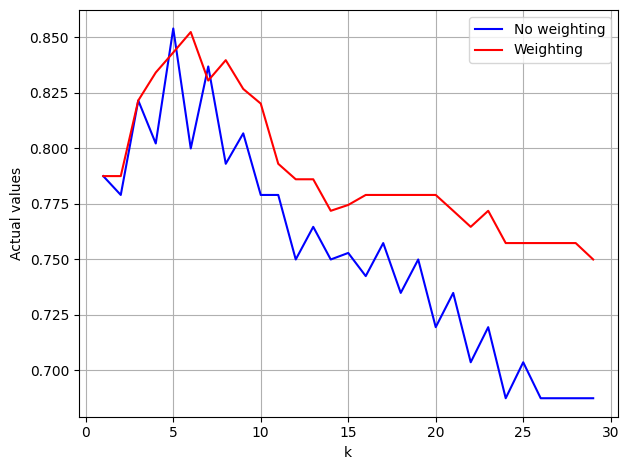

In [5]:
best1 = 0
lr = []
for ki in range(1,30,1):
    knc = nb.KNeighborsClassifier(n_neighbors=ki)
    score = best_k(knc)
    lr.append(score)
plt.plot(range(1,30,1),lr,'b',label='No weighting')

lr = []
for ki in range(1,30,1):
    knc = nb.KNeighborsClassifier(n_neighbors=ki,weights='distance')
    score = best_k(knc)
    if score > best1:
        best1 = score
    lr.append(score)
plt.plot(range(1,30,1),lr,'r',label='Weighting')
plt.xlabel('k')
plt.ylabel('Actual values')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()

plt.savefig('best_k.png')
plt.show()

#### Podemos observar que el mejor valor para K en K-NN es el 5, y para Weighted K-NN es el 6

#### Obtenemos un buen valor, pero de todas formas vamos a probar a eliminar algunas features para comprobar si obtenemos mejores o peores valores. Para ello eliminaremos las columnas más irrelevantes, y para identificar cuales de ellas lo son, utilizaremos con el algoritmo random forest.

### Feature selection con Random Forest para obtener las columnas más irrelevantes

In [6]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X, y)
print(clf.feature_importances_)  

[0.16518832 0.13970868 0.06322267 0.10034751 0.18441347 0.06368197
 0.10594872 0.00277279 0.01923866 0.00927238 0.01474517 0.02465707
 0.02025445 0.05737693 0.0291712 ]


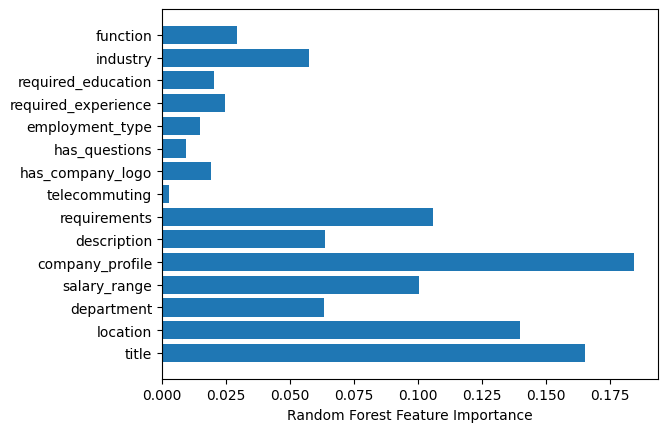

In [7]:
col = data.columns
col = col[0:15]
plt.barh(col, clf.feature_importances_)
plt.xlabel("Random Forest Feature Importance")
plt.savefig('Feature_importance.png', bbox_inches='tight')

#### Como se observa las 3 con menos importancia son telecommuting, has_company_logo y has_questions. Vamos a elimnarlas y comprobaremos si mejora el renidimiento de K-NN.

In [8]:
dele = ['telecommuting', 'has_company_logo', 'has_questions']
data = data.drop(labels=dele, axis=1)

In [9]:
X = data.values[:, 0:data.shape[1]-1]
y = data.values[:, data.shape[1]-1]

# Let's do a simple cross-validation: split data into training and test sets (test 30% of data)
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.33, random_state=1)

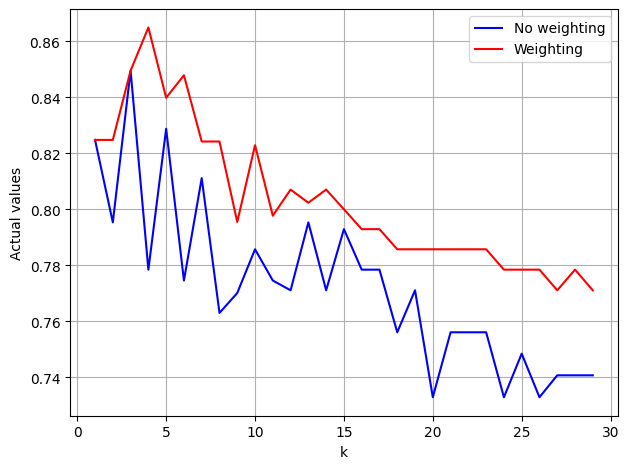

In [10]:
best2 = 0
lr = []
for ki in range(1,30,1):
    knc = nb.KNeighborsClassifier(n_neighbors=ki)
    score = best_k(knc)
    lr.append(score)
plt.plot(range(1,30,1),lr,'b',label='No weighting')

lr = []
for ki in range(1,30,1):
    knc = nb.KNeighborsClassifier(n_neighbors=ki,weights='distance')
    score = best_k(knc)
    if score > best2:
        best2 = score
    lr.append(score)
plt.plot(range(1,30,1),lr,'r',label='Weighting')
plt.xlabel('k')
plt.ylabel('Actual values')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()

plt.savefig('best_k_deleted_features.png')
plt.show()

In [11]:
print('Con todas features obtenemos:', best1, ', en cambio quitando features más irrelevantes obtenemos', best2)
print('Podemos observar una mejora considerable')

Con todas features obtenemos: 0.8524590163934426 , en cambio quitando features más irrelevantes obtenemos 0.8648648648648649
Podemos observar una mejora considerable


#### Con cross-validation

In [12]:
X = data.values[:, 0:data.shape[1]-1]
y = data.values[:, data.shape[1]-1]

In [13]:
from sklearn import metrics
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size=.3, random_state=1)

# Create a kNN classifier object
knc = nb.KNeighborsClassifier()

# Train the classifier
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1467
         1.0       0.95      0.73      0.82        95

    accuracy                           0.98      1562
   macro avg       0.96      0.86      0.91      1562
weighted avg       0.98      0.98      0.98      1562



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=91572d65-ca52-49ec-8072-8fb246390be4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>